In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


<Axes: >

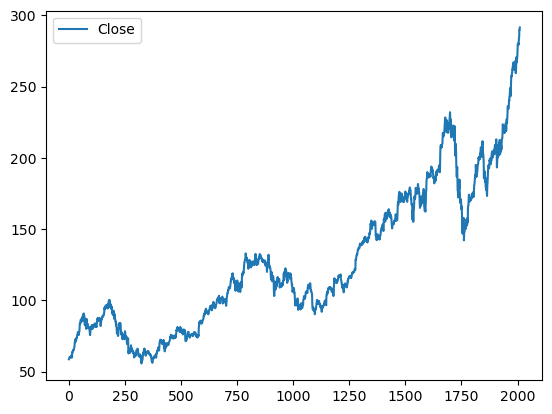

In [4]:
df.plot.line(y = 'Close', use_index = True)

In [5]:
df['Tomorrow'] = df['Close'].shift(-1)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,59.062859
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,59.718571
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,60.342857
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,60.247143
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,60.462856


In [7]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [8]:
df.head() # tomoroow prce is greater than todays price = 1, 0= if it is less

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,59.062859,1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,59.718571,1
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,60.342857,1
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,60.247143,0
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,60.462856,1


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,284.269989,1
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,289.910004,1
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,289.799988,0
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,291.519989,1
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,NaN,0


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model =RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [22]:
x = df.drop('Target', axis=1)
y = df['Target']

In [23]:
x.shape

(2011, 8)

In [44]:
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,59.062859
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,59.718571
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,60.342857
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,60.247143
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,60.462856


In [24]:
y.shape

(2011,)

In [45]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Target, dtype: int64

In [26]:
predictors = ['Close' , 'Volume' , 'Open', 'High' , 'Low']
model.fit(x[predictors], y)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [27]:
model.n_features_in_

5

In [75]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
# x =df[predictors]
# y = df['Target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
preds = model.predict(x_test[predictors])

In [33]:
preds

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [34]:
preds = pd.Series(preds, index = x_test.index)

In [39]:
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.723404255319149
Accuracy: 0.7344913151364765
Recall: 0.8018867924528302
F1 Score: 0.7606263982102909


In [41]:
combined = pd.concat([x, preds], axis = 1)

<Axes: >

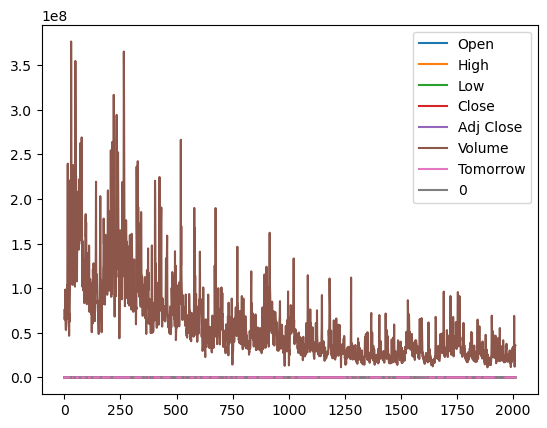

In [42]:
combined.plot()

In [51]:
def predict(x, y, predictors, model):
    model.fit(x[predictors], x["Target"])
    preds = model.predict(y[predictors])
    preds = pd.Series(preds, index=y.index, name="Predictions")
    combined = pd.concat([y["Target"], preds], axis=1)
    return combined

In [52]:
def backtest(data, model, predictors, start=100, step=50):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        x = data.iloc[:i].copy()
        y = data.iloc[i:i+step].copy()
        predictions = predict(x, y, predictors, model)
        all_predictions.append(predictions)

    if len(all_predictions) == 0:
        raise ValueError("No predictions were made — check dataset size or loop range.")
    
    return pd.concat(all_predictions)

In [53]:
predictions = backtest(df , model, predictors)

In [58]:
predictions['Predictions'].value_counts()

Predictions
1    1024
0     887
Name: count, dtype: int64

In [59]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.523286
0    0.476714
Name: count, dtype: float64

In [60]:
precision = precision_score(predictions['Target'], predictions['Predictions'])
accuracy = accuracy_score(predictions['Target'], predictions['Predictions'])
recall = recall_score(predictions['Target'], predictions['Predictions'])
f1 = f1_score(predictions['Target'], predictions['Predictions'])


print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.51953125
Accuracy: 0.4976452119309262
Recall: 0.532
F1 Score: 0.525691699604743


In [63]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,59.062859,1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,59.718571,1
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,60.342857,1
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,60.247143,0
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,60.462856,1


In [64]:
horizon = [2, 5, 30]  # example horizons

new_predictors = []

for h in horizon:
    rolling_averages = df[['Close', 'Volume', 'Open', 'High', 'Low']].rolling(h).mean()
    ratio_column = f"Close_Ratio_{h}"
    df[ratio_column] = df['Close'] / rolling_averages['Close']
    new_predictors.append(ratio_column)


In [65]:
df = df.dropna()

In [66]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_30
29,2012-02-14,72.094284,72.794289,71.714287,72.779999,62.892056,115099600,71.095711,0,1.006778,1.029075,1.144796
30,2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,376530000,71.744286,1,0.988293,0.996807,1.111109
31,2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,236138000,71.731430,0,1.004541,1.002271,1.113886
32,2012-02-17,71.872856,72.538574,71.471428,71.731430,61.985954,133951300,73.550003,1,0.999910,0.998624,1.106805
33,2012-02-21,72.411430,73.550003,72.017143,73.550003,63.557446,151398800,73.291428,0,1.012518,1.018976,1.127209


In [67]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state =1 )

In [71]:
def predict(x, y, predictors, model):
    model.fit(x[predictors], x["Target"])
    preds = model.predict_proba(y[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=y.index, name="Predictions")
    combined = pd.concat([y["Target"], preds], axis=1)
    return combined

In [72]:
predictions = backtest(df,  model, new_predictors)

In [73]:
predictions['Predictions'].value_counts()

Predictions
0.0    1559
1.0     322
Name: count, dtype: int64

In [76]:
precision = precision_score(predictions["Target"], predictions["Predictions"])
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])

print(f"Precision Score: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:\n", cm)

Precision Score: 0.5217
Accuracy: 0.4854
Precision: 0.5217
Confusion Matrix:
 [[745 154]
 [814 168]]
